## Homework 03: Interpolation
### PHYS420 — Intro to Computational Physics — Fall 2025  
### Hayden Dauphin

![Q1](Images/hw3q1.png)

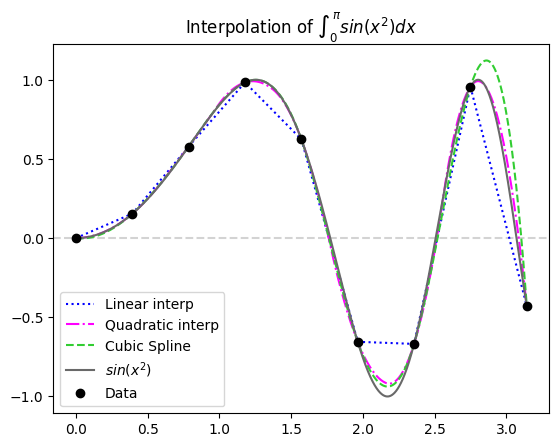

In [110]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy as sci
from scipy import interpolate as ip 


#1: f(x) = sin(x**2) on [0, pi]

x = np.linspace(0,np.pi, 9)
y = np.sin(x**2)
xvals = np.linspace(0, np.pi, 10000)
yvals = np.sin(xvals**2)

# a. Linear interpolation 
linear_interp = ip.interp1d(x, y, kind='linear')
y_linear = linear_interp(xvals)

# b. Quadratic interpolation
quad_interp = ip.interp1d(x, y, kind='quadratic')
y_quad = quad_interp(xvals)

# c. Cubic spline
cubic_spline = ip.CubicSpline(x, y)
y_cubic = cubic_spline(xvals)

#plot
fig, ax = plt.subplots()
ax.set_title(r"Interpolation of $\int_0^\pi sin(x^2) dx$")

ax.axhline(y=0, linestyle='--', color='lightgrey')

ax.plot(xvals, y_linear, ':', label='Linear interp', color='blue')   
ax.plot(xvals, y_quad, '-.', label='Quadratic interp', color='magenta')
ax.plot(xvals, y_cubic, '--', label='Cubic Spline', color='limegreen')
   
ax.plot(xvals, yvals, '-', label=r"$sin(x^2)$", color='dimgrey')
ax.plot(x, y, 'o', label='Data', color='black') 
ax.legend()
plt.show()

![q3](Images/hw3q2.png)

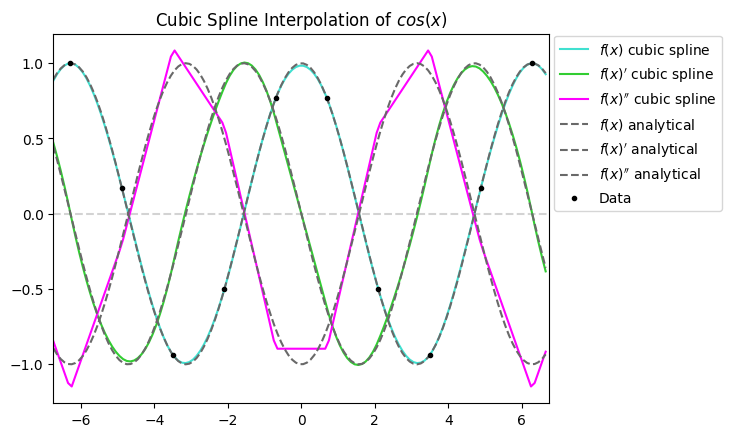

         x           f(x)         cos(x)        |Δ|          f'(x)        -sin(x)        |Δ|          f"(x)        -cos(x)        |Δ|
-------------------------------------------------------------------------------------------------------------------------------------
  3.141593    -0.99154019    -1.00000000   8.46e-03    -0.02839434    -0.00000000   2.84e-02     0.97084462     1.00000000   2.92e-02
  2.617994    -0.85240660    -0.86602540   1.36e-02    -0.48622158    -0.50000000   1.38e-02     0.77792663     0.86602540   8.81e-02
  2.356194    -0.69955683    -0.70710678   7.55e-03    -0.67725584    -0.70710678   2.99e-02     0.68146764     0.70710678   2.56e-02
  2.094395    -0.50000000    -0.50000000   3.89e-16    -0.84303720    -0.86602540   2.30e-02     0.58500864     0.50000000   8.50e-02
  1.570796    -0.00377660     0.00000000   3.78e-03    -1.00392132    -1.00000000   3.92e-03     0.02952344    -0.00000000   2.95e-02
  1.047198     0.50054081     0.50000000   5.41e-04    -0.8739

In [114]:
# 2. f(x) = cos(x) on [-2pi, 2pi]

x2 = np.linspace(-2*np.pi, 2*np.pi, 10)
y2 = np.cos(x2)

#Set cubic splice method and fine x values 
cubic2 = ip.CubicSpline(x2, y2, bc_type='periodic')
xvals2 = np.arange(-6.75, 6.75, 0.1)

# Spline of the function, first deriv, and second deriv
cs0 = cubic2(xvals2)
cs1 = cubic2(xvals2, 1)
cs2 = cubic2(xvals2, 2)

# Plot
fig, ax = plt.subplots()
ax.set_title(r"Cubic Spline Interpolation of $cos(x)$")
ax.set_xlim(-6.75, 6.75)

ax.axhline(y=0, linestyle='--', color='lightgrey')

# Plot spline lines 
ax.plot(xvals2, cubic2(xvals2), label=r'$f(x)$ cubic spline', color="turquoise")
ax.plot(xvals2, cs1, label=r"$f(x)'$ cubic spline", color='limegreen')
ax.plot(xvals2, cs2, label=r"$f(x)''$ cubic spline", color='magenta')

# Plot analytical lines 
ax.plot(xvals2, np.cos(xvals2), linestyle='--', label=r'$f(x)$ analytical', color='dimgrey')
ax.plot(xvals2, -np.sin(xvals2), linestyle="--", label=r"$f(x)'$ analytical", color='dimgrey')
ax.plot(xvals2, -np.cos(xvals2), linestyle='--', label=r"$f(x)''$ analytical", color='dimgrey')
ax.plot(x2, y2, '.', label='Data', color='black')

ax.legend(loc=(1.01, 0.52))

plt.show()


# Numerical/Analytical Comparison 

# Define set points to check values 
checkpoints = np.array([np.pi, 5*np.pi/6, 3*np.pi/4, 2*np.pi/3, np.pi/2, np.pi/3, np.pi/4, np.pi/6, 0. ])

# Find splined values at checkpoints for function, first deriv, and second deriv
check0 = cubic2(checkpoints)
check1 = cubic2(checkpoints, 1)
check2 = cubic2(checkpoints, 2)

# Find analytical values at checkpoints for function, first deriv, and second deriv
actual0 = np.cos(checkpoints)
actual1 = -np.sin(checkpoints)
actual2 = -np.cos(checkpoints)


# print values in columns and rows 
header = f"{'x':>10} {'f(x)':>14} {'cos(x)':>14} {'|Δ|':>10} {'f\'(x)':>14} {'-sin(x)':>14} {'|Δ|':>10} {'f\"(x)':>14} {'-cos(x)':>14} {'|Δ|':>10}"
print(header)
print("-"*len(header))
# xi = base;            
# sv = spline value 0;      av = actual value 0;  
# sd1 = spline deriv 1;     ad1 = acutal deriv 1; 
# sd2 = spline deriv 2;     ad2 = actual deriv 2
for xi, sv, av, sd1, ad1, sd2, ad2 in zip(checkpoints, check0, actual0, check1, actual1, check2, actual2):
    print(f"{xi:10.6f} {sv:14.8f} {av:14.8f} {abs(sv-av):10.2e} "
          f"{sd1:14.8f} {ad1:14.8f} {abs(sd1-ad1):10.2e} "
          f"{sd2:14.8f} {ad2:14.8f} {abs(sd2-ad2):10.2e}")



![q3a](Images/hw3q3a.png)
![q3b](Images/hw3q3b.png)

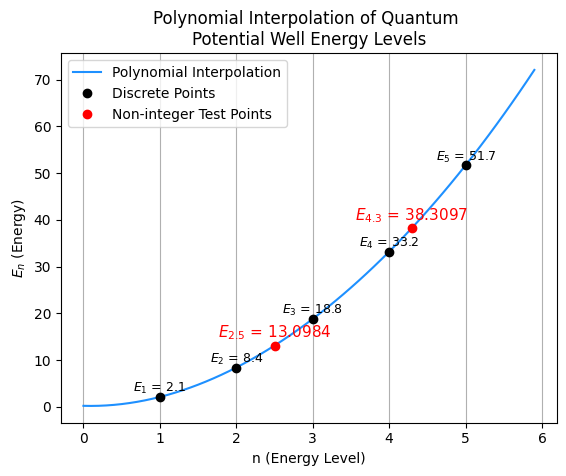

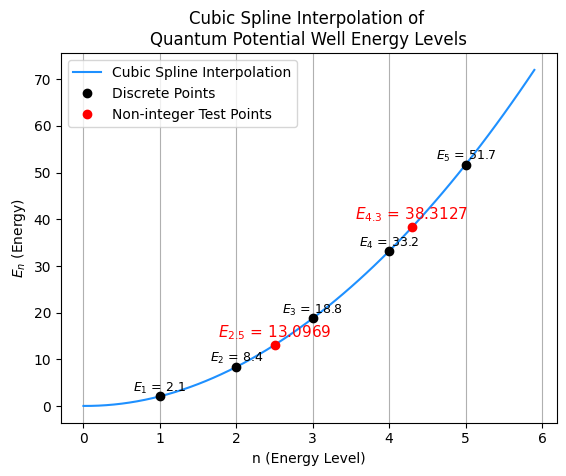

In [112]:
# 3. Quantum well with discrete energy levels n=1-5; interpolate to estimate energy for n=2.5 and 4.3; use polynomial interp

n = np.array([1,2,3,4,5])   # energy levels
En = np.array([2.1, 8.4, 18.8, 33.2, 51.7])     #energies at levels n = 1—5 

nvals = np.arange(0, 6 , 0.1)   #create fine values for function 

# POLYNOMIAL interpolation method
polyip = ip.BarycentricInterpolator(n, En)

fig, ax = plt.subplots()
ax.grid(axis='x')
ax.set_title("Polynomial Interpolation of Quantum \nPotential Well Energy Levels")
ax.set_xlabel("n (Energy Level)")
ax.set_ylabel(r"$E_n$ (Energy)")
ax.plot(nvals, polyip(nvals), label="Polynomial Interpolation", color='dodgerblue')
ax.plot(n, En, 'o', label="Discrete Points", color='black')

# Annotation on plotted points
for i, (xi, yi) in enumerate(zip(n, En), start=1):
    ax.text(xi, yi + 1, rf"$E_{i}$ = {yi:.1f}", ha='center', fontsize=9)

# define non-integer points, plot, and annotate them in polynomial interp
testpoints = np.array([2.5,4.3])
ax.plot(testpoints, polyip(testpoints), 'o', label="Non-integer Test Points", color='red')

for j, (xj, yj) in enumerate(zip(testpoints,polyip(testpoints))):
    ax.text(xj, yj + 1.7, rf"$E_{{{xj}}}$ = {yj:.4f}", ha='center', fontsize=11, color='red')

ax.legend()
plt.show()


# CUBIC SPLINE interpolation method
energySpline = ip.CubicSpline(n, En)

fig, ax = plt.subplots()
ax.grid(axis='x')
ax.set_title("Cubic Spline Interpolation of \nQuantum Potential Well Energy Levels")
ax.set_xlabel("n (Energy Level)")
ax.set_ylabel(r"$E_n$ (Energy)")
ax.plot(nvals, energySpline(nvals), label="Cubic Spline Interpolation", color='dodgerblue')
ax.plot(n, En, 'o', label="Discrete Points", color='black')

# Annotations
for i, (xi, yi) in enumerate(zip(n, En), start=1):
    ax.text(xi, yi + 1, rf"$E_{i}$ = {yi:.1f}", ha='center', fontsize=9)

# plot and annotate non-integer test points in cubic spline interp
ax.plot(testpoints, energySpline(testpoints), 'o', label="Non-integer Test Points", color='red')

for j, (xj, yj) in enumerate(zip(testpoints,energySpline(testpoints))):
    ax.text(xj, yj + 1.7, rf"$E_{{{xj}}}$ = {yj:.4f}", ha='center', fontsize=11, color='red')

ax.legend()
plt.show()


